# Pytorch
Installation: https://pytorch.org/get-started/locally/

Documentation: https://pytorch.org/docs/stable/index.html

In [ ]:
import sys
print(f'Using python version {sys.version}') # get python version

Using python version 3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]


# Downloading data:

In [ ]:
# Addresses some bug with gdown
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown 17gstq9gv4hzG1tHE1obo8URmduY0Ics9 # X_train_valid.npy
!gdown 105LOnheUVqo5SpnTmSPFQctKXNmeB8ZK # y_train_valid.npy

Downloading...
From: https://drive.google.com/uc?id=17gstq9gv4hzG1tHE1obo8URmduY0Ics9
To: /content/X_train_valid.npy
100% 372M/372M [00:02<00:00, 164MB/s]
Downloading...
From: https://drive.google.com/uc?id=105LOnheUVqo5SpnTmSPFQctKXNmeB8ZK
To: /content/y_train_valid.npy
100% 8.59k/8.59k [00:00<00:00, 13.8MB/s]


# Enabling GPU in Google colab
1. Runtime -> Change runtime type -> Hardware accelerator -> GPU
2. Note that Google colab has a limited compute allowance and also an inactivity timeout.

p.s. If indentation width is unexpected, go to Tools -> Settings -> Editor -> Indentation width in spaces


# Pytorch basics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

import torch # import pytorch
import torch.nn as nn # pytorch's neural networks module
import torch.nn.functional as F # functional module.

print(f'Using pytorch version {torch.__version__}')

Using pytorch version 1.13.1+cu116


In [ ]:
u_np = np.arange(5, dtype='float64')
u = torch.FloatTensor(u_np) # Create a 32-bit float tensor using the data in u_np
print(u)

tensor([0., 1., 2., 3., 4.])


In [ ]:
v = torch.tensor(u_np.astype('float32'), requires_grad=True) # use 32-bit float for compatibility
print(v)

tensor([0., 1., 2., 3., 4.], requires_grad=True)


In [ ]:
u_sumsq = (u**2).sum()
try:
    u_sumsq.backward() # backward pass computes gradients with respect to the calling tensor
except Exception as e:
    print(f'Exception: {str(e)}')
print(u, u.grad)

Exception: element 0 of tensors does not require grad and does not have a grad_fn
tensor([0., 1., 2., 3., 4.]) None


In [ ]:
# Note that gradients accumulate (summation) with multiple backward passes
# Use optimizer.zero_grad() when an optimizer is used (shown later)
# Use v.grad = None to clear the gradient (ONLY WHEN MODIFYING GRADIENTS MANUALLY)
v_sumsq = (v**2).sum() # gradient should be 2*v
v_sumsq.backward()
print(v, v.grad)

v_sumsq = (v**2).sum()
v_sumsq.backward(retain_graph=True) # Use retain_graph=True if the computation graph needs to be used in multiple backward passes
print(v, v.grad)

v_sumsq.backward() 
print(v, v.grad)

tensor([0., 1., 2., 3., 4.], requires_grad=True) tensor([0., 2., 4., 6., 8.])
tensor([0., 1., 2., 3., 4.], requires_grad=True) tensor([ 0.,  4.,  8., 12., 16.])
tensor([0., 1., 2., 3., 4.], requires_grad=True) tensor([ 0.,  6., 12., 18., 24.])


In [ ]:
v_sumsq = (v**2).sum()
v_sumsq.backward(retain_graph=False) # Use retain_graph=True if the computation graph needs to be used in multiple backward passes
print(v, v.grad)

v_sumsq.backward() 
print(v, v.grad)

tensor([0., 1., 2., 3., 4.], requires_grad=True) tensor([ 0.,  8., 16., 24., 32.])


RuntimeError: ignored

In [ ]:
v_sumsq

tensor(30., grad_fn=<SumBackward0>)

In [ ]:
with torch.no_grad():
    pass

In [ ]:
# make u store gradient
u.requires_grad_(True)
u_sumsq = (u**2).sum()
u_sumsq.backward() # backward pass computes gradients with respect to the calling tensor
print(u, u.grad)

tensor([0., 1., 2., 3., 4.], requires_grad=True) tensor([0., 2., 4., 6., 8.])


In [ ]:
u.grad = None
(2*u).backward(torch.ones(*u.shape)) # You can also pass an upstream gradient manually
print(u, u.grad)

tensor([0., 1., 2., 3., 4.], requires_grad=True) tensor([2., 2., 2., 2., 2.])


In [ ]:
# Use the torch.no_grad() context to skip computing gradients and retaining the computational graph
# Note the absence of grad_fn in the second output
# See https://pytorch.org/docs/stable/generated/torch.no_grad.html
u.grad = None
print(2*u)
with torch.no_grad():
    u.grad = None
    print(2*u)

tensor([0., 2., 4., 6., 8.], grad_fn=<MulBackward0>)
tensor([0., 2., 4., 6., 8.])


In [ ]:
# detach tensors to prevent gradients from flowing through
u.grad = None
(u + u.detach()).backward(torch.ones(*u.shape))
print(u, u.grad)

tensor([0., 1., 2., 3., 4.], requires_grad=True) tensor([1., 1., 1., 1., 1.])


In [ ]:
# cloning tensors copies them but allows gradients to flow through
u.grad = None
(u + u.clone()).backward(torch.ones(*u.shape))
print(u, u.grad)

tensor([0., 1., 2., 3., 4.], requires_grad=True) tensor([2., 2., 2., 2., 2.])


In [ ]:
# call .cuda() or .to(device) to pass to the GPU or a specific device, respectively
#   device can be 'cpu', a number (0, 1, ...), or the return of torch.device(device_id),
#     where device_id is 'cpu' or a number.
# call .cpu() to pass to the CPU
# call .numpy() to convert to numpy, but only if the tensor is on the CPU already
u.cuda().detach().cpu().numpy()

array([0., 1., 2., 3., 4.], dtype=float32)

In [ ]:
# We can also manually modify gradients
with torch.no_grad():
    if u.grad is not None:
        u.grad[:] = 3.0
print(u, u.grad)

tensor([0., 1., 2., 3., 4.], requires_grad=True) tensor([3., 3., 3., 3., 3.])


In [ ]:
u.grad[:] = 3.0

In [ ]:
# Use nvidia-smi (in the console or as a magic command) to check GPU utilization.
# I don't know how to check this on Colab while already running code
!nvidia-smi

Wed Mar  1 23:19:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W /  70W |    573MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Useful functions:
# Note that pytorch uses dim in most places and accepts axis sometimes, but not usually.
print('cat:', torch.cat([torch.zeros(3, 4), torch.ones(3, 4)], dim=1).shape)
print('stack:', torch.stack([torch.zeros(3, 4), torch.ones(3, 4)], dim=1).shape)
print('permute:', torch.zeros(3, 4, 5).permute(2, 0, 1).shape) # similar to np.ndarray.transpose
print('view:', torch.zeros(3, 4, 5).view(3, 20).shape)
print('reshape:', torch.zeros(3, 4, 5).reshape(3, 20).shape)
print('softmax:', F.softmax(torch.randn(3, 4), dim=-1).sum(1))
# See also:
# torch.zeros
# torch.ones
# torch.randn
# torch.empty
# torch.full
# torch.ones_like
# torch.zeros_like
# torch.randn_like
# F.softmax (i.e. torch.nn.functional.softmax)
# F.log_softmax (i.e. torch.nn.functional.log_softmax)
# torch.nn.Module.register_buffer
# torch.nn.Module.register_parameter

cat: torch.Size([3, 8])
stack: torch.Size([3, 2, 4])
permute: torch.Size([5, 3, 4])
view: torch.Size([3, 20])
reshape: torch.Size([3, 20])
softmax: tensor([1.0000, 1.0000, 1.0000])


# Loading and examining data

In [ ]:
X_train_valid = np.load("X_train_valid.npy")
y_train_valid = np.load("y_train_valid.npy")

In [ ]:
print (f'Training/Valid data shape: {X_train_valid.shape}')
print (f'Training/Valid labels shape: {y_train_valid.shape}')

Training/Valid data shape: (2115, 22, 1000)
Training/Valid labels shape: (2115,)


Text(0, 0.5, 'count')

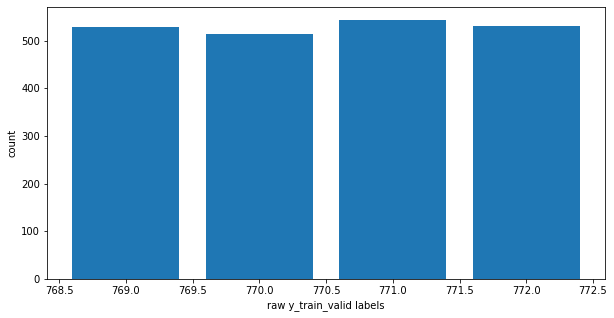

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(*np.unique(y_train_valid, return_counts=True))
plt.xlabel('raw y_train_valid labels')
plt.ylabel('count')

In [ ]:
# Convert to 0-4 labeling and integer type (integers needed for categorical labels)
y_train_valid = (y_train_valid - np.min(y_train_valid)).astype('int')

# Modules

In [ ]:
# nn.Module

In [ ]:
# Dense layer
in_features = 8
out_features = 5
x = torch.zeros(7, in_features)
layer = nn.Linear(in_features, out_features)
print(x.shape, layer(x).shape)

torch.Size([7, 8]) torch.Size([7, 5])


In [ ]:
print(layer.weight.shape)

torch.Size([5, 8])


In [ ]:
print(layer.bias)

Parameter containing:
tensor([-0.2841,  0.0054,  0.0652, -0.0859,  0.2232], requires_grad=True)


In [ ]:
with torch.no_grad():
    layer.weight[:] = 0.0

In [ ]:
print(layer(x))

tensor([[-0.2841,  0.0054,  0.0652, -0.0859,  0.2232],
        [-0.2841,  0.0054,  0.0652, -0.0859,  0.2232],
        [-0.2841,  0.0054,  0.0652, -0.0859,  0.2232],
        [-0.2841,  0.0054,  0.0652, -0.0859,  0.2232],
        [-0.2841,  0.0054,  0.0652, -0.0859,  0.2232],
        [-0.2841,  0.0054,  0.0652, -0.0859,  0.2232],
        [-0.2841,  0.0054,  0.0652, -0.0859,  0.2232]],
       grad_fn=<AddmmBackward0>)


In [ ]:
# Sequential layers
sequential = nn.Sequential(
    nn.LazyLinear(17),
    nn.LazyLinear(19)
)
print(x.shape, sequential(x).shape)

torch.Size([7, 8]) torch.Size([7, 19])


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [ ]:
print(sequential)

Sequential(
  (0): Linear(in_features=8, out_features=17, bias=True)
  (1): Linear(in_features=17, out_features=19, bias=True)
)


In [ ]:
sequential[0].weight.shape

torch.Size([17, 8])

In [ ]:
sequential[1].weight.shape

torch.Size([19, 17])

# Shallow Convnet
From "Deep Learning Wtih Convolutional Neural Networks for EEG Decoding and Visualization", Schirrmeister et al., 2017 (https://doi.org/10.1002/hbm.23730)
* diagram does not show ELU activations

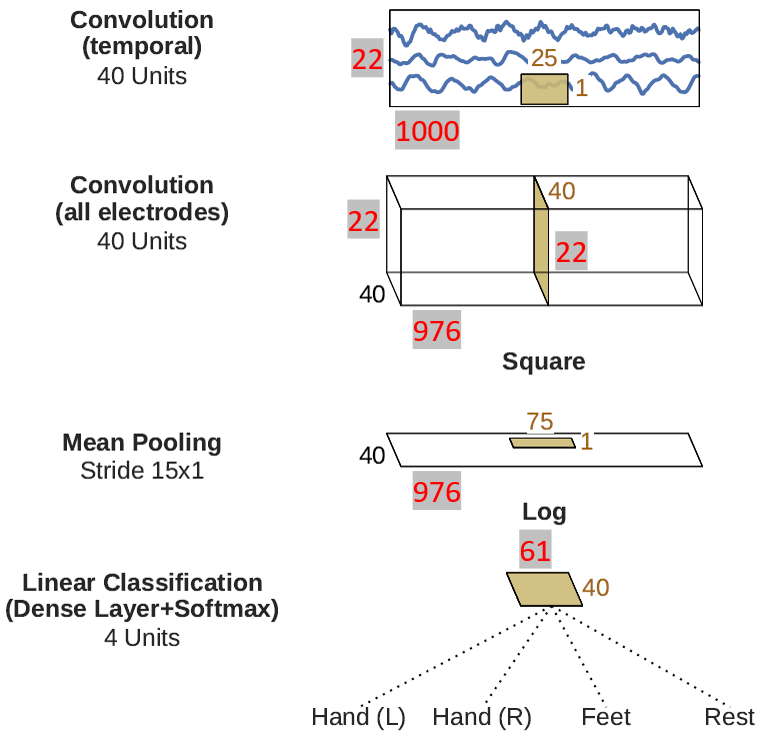

In [ ]:
# inherits from nn.Module
class ShallowConvNet(nn.Module):
    def __init__(self, input_shape=(22, 1000), n_temporal_filters=40, n_spatial_filters=40, n_classes=4):
        super().__init__() # call __init__ method of superclass
        
        self.input_shape = input_shape # last two dimensions, (excluding batch size). Should be length 2.
        self.n_temporal_filters = n_temporal_filters
        self.n_spatial_filters = n_spatial_filters
        self.n_classes = n_classes

        # https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)
        self.temporal_convolution = nn.Conv2d(1, n_temporal_filters, (1, 25))

        # We could implement the spatial convolution as a 1d, or 2d, or 3d convolution.
        # We use 2d here.
        self.spatial_convolution = nn.Conv2d(n_temporal_filters, n_spatial_filters, (input_shape[0], 1))

        self.average_pool = nn.AvgPool2d((1, 75), stride=(1, 15))

        # Final linear layer
        self.n_dense_features = n_spatial_filters*(1 + ((input_shape[1] - 25 + 1) - 75) // 15)
        self.dense = nn.Linear(self.n_dense_features, n_classes)
        # you can also use 'self.dense = nn.LazyLinear(n_classes)' to avoid having to manually compute features

        self.elu = nn.ELU()
        return
    
    # declaring a forward method also makes the instance a callable.
    # e.g.:
    # model = ShallowConvNet()
    # out = model(x)
    def forward(self, x):
        # x has shape (batch_size, input_shape[0], input_shape[1])
        # Let H0 = input_shape[0], H1 = input_shape[1]
        h = x

        # note that h.view(-1, 1, h.shape[1], h.shape[2]) works normally but does not work with torchinfo
        # this is because the torchinfo input has a weird shape
        h = h.view(-1, 1, self.input_shape[0], self.input_shape[1]) # view as (batch_size, 1, input_shape[0], input_shape[1])
        # Sometimes, view doesn't work and you have to use reshape. This is because of how tensors are stored in memory.

        # 2d convolution takes inputs of shape (batch_size, num_channels, H, W)
        h = self.temporal_convolution(h) # (batch_size, 1, H0, W0) -> (batch_size, n_temporal_filters, H0, W0 - 25 + 1)
        h = self.elu(h)

        h = self.spatial_convolution(h) # (batch_size, n_temporal_filters, H0, W0 - 25 + 1) -> (batch_size, n_spatial_filters, 1, W0 - 25 + 1)
        h = self.elu(h)

        h = h**2 # square
        # alternatively, use torch.pow(h, 2.0)

        h = self.average_pool(h) # (batch_size, n_spatial_filters, 1, W0 - 25 + 1) -> (batch_size, n_spatial_filters, 1, 1 + ((W0 - 25 + 1) - 75)//15)

        h = torch.log(h) # (natural) log

        h = h.view(h.shape[0], -1) # flatten the non-batch dimensions
        h = self.dense(h) # (batch_size, self.n_dense_features) -> (batch_size, n_classes)

        return h



# Summarizing modules

In [ ]:
# torchsummary is deprecated. Use torchinfo instead (https://github.com/TylerYep/torchinfo).
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from torchinfo import summary
# Only uses outputs of modules.
print(summary(ShallowConvNet(), input_size=(22, 1000)))

Layer (type:depth-idx)                   Output Shape              Param #
ShallowConvNet                           [1, 4]                    --
├─Conv2d: 1-1                            [1, 40, 22, 976]          1,040
├─ELU: 1-2                               [1, 40, 22, 976]          --
├─Conv2d: 1-3                            [1, 40, 1, 976]           35,240
├─ELU: 1-4                               [1, 40, 1, 976]           --
├─AvgPool2d: 1-5                         [1, 40, 1, 61]            --
├─Linear: 1-6                            [1, 4]                    9,764
Total params: 46,044
Trainable params: 46,044
Non-trainable params: 0
Total mult-adds (M): 56.73
Input size (MB): 0.09
Forward/backward pass size (MB): 7.18
Params size (MB): 0.18
Estimated Total Size (MB): 7.46


# Using GPUs with pytorch

In [ ]:
# See https://pytorch.org/docs/stable/notes/cuda.html
print(torch.cuda.is_available())
device_id = 0 if torch.cuda.is_available() else 'cpu' # Equivalent to device_id = 'cuda:0'
device = torch.device(device_id) # use these semantics to specify a specific device. 

True


In [ ]:
print(torch.zeros(4).cuda().device)
print(torch.zeros(4).to(device).device)
print(torch.zeros(4).to('cpu').device)

cuda:0
cuda:0
cpu


In [ ]:
# You can't mix cpu and gpu tensors!
try:
    torch.zeros(4).cuda() + torch.zeros(4)
except Exception as e:
    print(f'Exception: {str(e)}')

Exception: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!


# Creating a dataset and dataloader

In [ ]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train_np, X_val_np, y_train_np, y_val_np = train_test_split(X_train_valid, y_train_valid, test_size=0.2, random_state=12345)
X_train = torch.FloatTensor(X_train_np).to(device)
X_val = torch.FloatTensor(X_val_np).to(device)
y_train = torch.LongTensor(y_train_np).to(device)
y_val = torch.LongTensor(y_val_np).to(device)

In [ ]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, X, Y):
        if isinstance(X, np.ndarray):
            self.X = torch.FloatTensor(X) # 32-bit float
        else:
            self.X = X
        if isinstance(Y, np.ndarray):
            self.Y = torch.LongTensor(Y) # integer type
        else:
            self.Y = Y
        return
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, index):
        return self.X[index], self.Y[index]

In [ ]:
batch_size = 64
train_dataset = MyDataset(X_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size, shuffle=True)

val_dataset = MyDataset(X_val, y_val)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size, shuffle=False)

In [ ]:
len(train_dataset), len(train_dataloader)

(1692, 27)

# Training a model

In [ ]:
import tqdm # for progress bar

In [ ]:
# Set the random seeds.
# Sometimes some operations are not deterministic.
# See https://pytorch.org/docs/stable/notes/randomness.html
#   and https://pytorch.org/docs/stable/generated/torch.use_deterministic_algorithms.html
torch.manual_seed(12345) # set the random seed for pytorch
random.seed(12345) # just in case
np.random.seed(12345) # just in case

model = ShallowConvNet().to(device)
# For weight regularization, add weight_decay=l2_regularization_strength to the optimizer instantiation,
#   or implement it manually and add it to the loss before backward propagation.

# Declare an optimizer that handles weight updates
# This optimizer also has its own state dictionary
optimizer = torch.optim.Adam(model.parameters())
celoss = nn.CrossEntropyLoss()

loss_hist = []
val_loss_hist = []
acc_hist = []
val_acc_hist = []

In [ ]:
num_epochs = 10

# progress bar
pbar = tqdm.tqdm(
    range(num_epochs), position=0, leave=True,
    bar_format='{l_bar}{bar:30}{r_bar}',
)
for epoch in pbar:
    model.train() # set model to training mode.
    for batch in train_dataloader:
        optimizer.zero_grad() # clear gradients of parameters that optimizer is optimizing
        x, y = batch

        # x = x.to(device) # necessary if X is not on the same device as model
        # y = y.to(device)

        out = model(x) # shape (batch_size, n_classes)
        loss = celoss(out, y) # calculate the cross entropy loss

        loss.backward() # backpropagate
        optimizer.step() # perform optimization step

        # IMPORTANT: DO NOT store 'loss' by itself, since it references its entire computational graph.
        # Otherwise you will run out of memory.
        # You MUST use .item() to convert to a scalar or call .detach().
        loss_hist.append(loss.item())
    
    model.eval() # set model to evaluation mode. Relevant for dropout, batchnorm, layernorm, etc.
    # calculate accuracy for training and validation sets
    ns = 0 # number of samples
    nc = 0 # number of correct outputs
    with torch.no_grad():
        for batch in train_dataloader:
            x, y = batch
            out = model(x)
            ns += len(y)
            nc += (out.max(1)[1] == y).detach().cpu().numpy().sum()
    acc_hist.append(nc/ns)

    ns = 0 # number of samples
    nc = 0 # number of correct outputs
    with torch.no_grad():
        for batch in val_dataloader:
            x, y = batch
            out = model(x)
            loss = celoss(out, y)
            val_loss_hist.append(loss.item())
            ns += len(y)
            nc += (out.max(1)[1] == y).detach().cpu().numpy().sum()
    val_acc_hist.append(nc/ns)


    # update progress bar postfix
    pbar.set_postfix({'acc': acc_hist[-1], 'val_acc': val_acc_hist[-1]})

100%|██████████████████████████████| 10/10 [00:15<00:00,  1.57s/it, acc=0.79, val_acc=0.572]


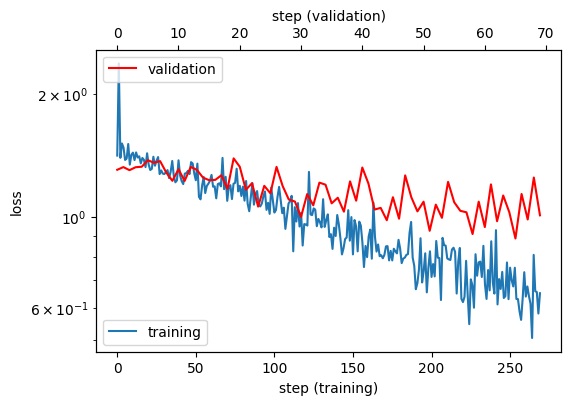

In [ ]:
plt.figure(dpi=100)
plt.plot(loss_hist, label='training')
plt.yscale('log')
plt.ylabel('loss')
plt.legend(loc='lower left')
plt.xlabel('step (training)')
plt.twiny()
plt.plot(val_loss_hist, 'r', label='validation')
plt.xlabel('step (validation)')
plt.legend(loc='upper left')

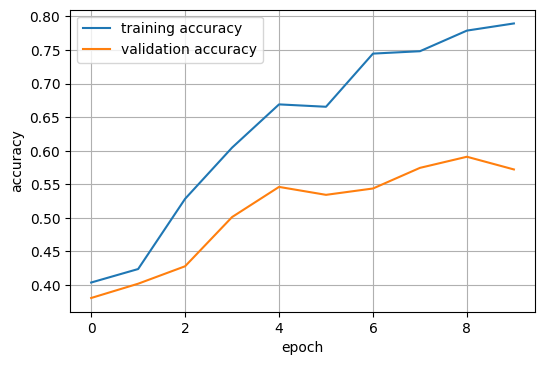

In [ ]:
plt.figure(dpi=100)
plt.plot(acc_hist)
plt.plot(val_acc_hist)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training accuracy', 'validation accuracy'])
plt.grid()

# Saving models

In [ ]:
print(type(model.state_dict()))
print(model.state_dict().keys())

<class 'collections.OrderedDict'>
odict_keys(['temporal_convolution.weight', 'temporal_convolution.bias', 'spatial_convolution.weight', 'spatial_convolution.bias', 'dense.weight', 'dense.bias'])


In [ ]:
# Best to use .pt for file extensions
# I used to think .pth was used, but it turns out it can have potential conflicts with python
#   (See https://stackoverflow.com/questions/59095824/what-is-the-difference-between-pt-pth-and-pwf-extentions-in-pytorch)

# Save only the model weights
torch.save(model.state_dict(), 'shallowconvnet_weightsonly.pt')

# Save an entire checkpoint
checkpoint = {
    'model': model.state_dict(),
    'optimizer': optimizer.state_dict(),
    'loss_hist': loss_hist,
    'acc_hist': acc_hist,
    'val_loss_hist': val_loss_hist,
    'val_acc_hist': val_acc_hist,
}
torch.save(checkpoint, 'shallowconvnet_checkpoint.pt')

In [ ]:
chkpt = torch.load('shallowconvnet_checkpoint.pt')

In [ ]:
chkpt.keys()

dict_keys(['model', 'optimizer', 'loss_hist', 'acc_hist', 'val_loss_hist', 'val_acc_hist'])

In [ ]:
model.load_state_dict(chkpt['model'])

<All keys matched successfully>

#RNN

In [ ]:
class RNNClassifier(nn.Module):
    def __init__(self, input_dim=22, hidden_dim=20, output_dim=4):
        super(RNNClassifier, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        
        self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x, h_0=None):
        # x has shape (batch_size, input_dim, timesteps)
        # h_0 has shape (D*num_layers, hidden_dim)

        z = x.permute(0, 2, 1) # (batch_size, input_dim, timesteps) -> (batch_size, timesteps, input_dim)
        if h_0 is None:
            z, hn = self.rnn(z) # (batch_size, timesteps, input_dim) -> (batch_size, timesteps, hidden_dim)
        else:
            # We detach h_0 (not required, just recommended) so that the computational graph does not extend too far.
            z, hn = self.rnn(z, h_0.detach()) # (batch_size, timesteps, input_dim) -> (batch_size, timesteps, hidden_dim)
        # hn is the stored hidden state after computation
        out = self.fc(z[:, -1, :])
        return out

In [ ]:
# Note that sometimes RNNs run faster on cpu, but usually only if they're small.
#device = torch.device('cpu')

model = RNNClassifier(22, 64, 4).to(device)
optimizer = torch.optim.Adam(model.parameters())
celoss = nn.CrossEntropyLoss()

loss_hist = []
val_loss_hist = []
acc_hist = []
val_acc_hist = []

In [ ]:
num_epochs = 50

# progress bar
pbar = tqdm.tqdm(
    range(num_epochs), position=0, leave=True,
    bar_format='{l_bar}{bar:30}{r_bar}',
)
for epoch in pbar:
    model.train() # set model to training mode.
    for batch in train_dataloader:
        optimizer.zero_grad() # clear gradients of parameters that optimizer is optimizing
        x, y = batch

        # x = x.to(device) # necessary if X is not on the same device as model
        # y = y.to(device)

        out = model(x) # shape (batch_size, n_classes)
        loss = celoss(out, y) # calculate the cross entropy loss

        loss.backward() # backpropagate
        optimizer.step() # perform optimization step

        # IMPORTANT: DO NOT store 'loss' by itself, since it references its entire computational graph.
        # Otherwise you will run out of memory.
        # You MUST use .item() to convert to a scalar or call .detach().
        loss_hist.append(loss.item())
    
    model.eval() # set model to evaluation mode.
    # calculate accuracy for training and validation sets
    ns = 0 # number of samples
    nc = 0 # number of correct outputs
    with torch.no_grad():
        for batch in train_dataloader:
            x, y = batch
            out = model(x)
            ns += len(y)
            nc += (out.max(1)[1] == y).detach().cpu().numpy().sum()
    acc_hist.append(nc/ns)

    ns = 0 # number of samples
    nc = 0 # number of correct outputs
    with torch.no_grad():
        for batch in val_dataloader:
            x, y = batch
            out = model(x)
            loss = celoss(out, y)
            val_loss_hist.append(loss.item())
            ns += len(y)
            nc += (out.max(1)[1] == y).detach().cpu().numpy().sum()
    val_acc_hist.append(nc/ns)


    # update progress bar postfix
    pbar.set_postfix({'acc': acc_hist[-1], 'val_acc': val_acc_hist[-1]})

100%|██████████████████████████████| 50/50 [00:15<00:00,  3.13it/s, acc=0.664, val_acc=0.288]


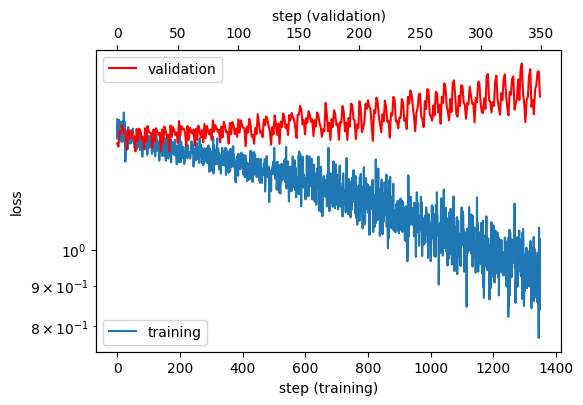

In [ ]:
plt.figure(dpi=100)
plt.plot(loss_hist, label='training')
plt.yscale('log')
plt.ylabel('loss')
plt.legend(loc='lower left')
plt.xlabel('step (training)')
plt.twiny()
plt.plot(val_loss_hist, 'r', label='validation')
plt.xlabel('step (validation)')
plt.legend(loc='upper left')

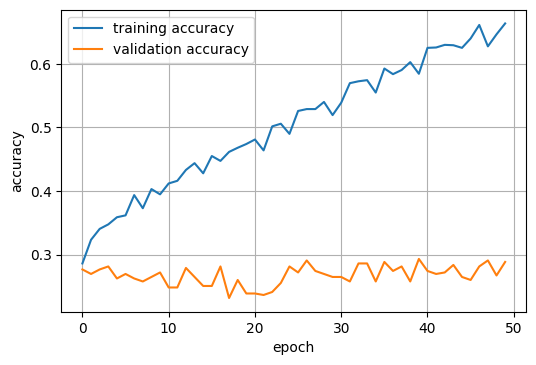

In [ ]:
plt.figure(dpi=100)
plt.plot(acc_hist)
plt.plot(val_acc_hist)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training accuracy', 'validation accuracy'])
plt.grid()